**The relationship between istalling CCTV and crime**
<br><br>
2016110838 행정학전공 홍서이

**Before data analysis**
- import libraries
- set font for Korean

In [1]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import math
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

!pip install folium
import folium


In [2]:
# font for data visualization

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

**Creating DataFrames and organizing data**

In this notebook, I would like to analyze the relationship between CCTV and crime. 
For this analysis, I will integrate a total of four pieces of data.
- data1: crime in Seoul in 2020
- data2 : Distinctive CCTV setup in Seoul up to 2021
- data3 = Area per district in Seoul
- data4 = Population in Seoul


In [3]:
# data1: crime in Seoul in 2020
crime = pd.read_csv('crime_seoul(2020).csv', encoding='cp949')
crime.head()


,자치구,전체 범죄 발생 건수,전체 범죄 검거 건수,살인 발생 건수,살인 검거 건수,강도 발생 건수,강도 검거 건수,강간강제추행 발생 건수,강간강제추행 검거 건수,절도 발생 건수,절도 검거 건수,폭력 발생 건수,폭력 검거 건수
0,종로구,3102,3343,9,7,7,9,192,855,1183,944,1711,1528
1,중구,3411,2323,2,2,5,6,186,128,1642,863,1576,1324
2,용산구,2969,2056,5,3,6,6,230,186,1111,534,1617,1327
3,성동구,2362,1774,5,5,3,3,115,98,1016,565,1223,1103
4,광진구,3601,2511,2,2,4,4,255,224,1664,874,1676,1407


In [4]:
#data2 : Distinctive CCTV setup in Seoul up to 2021
cctv_setup = pd.read_csv('cctv_setup_seoul.csv', encoding='cp949')
cctv_setup.head()

,자치구,cctv 총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년 신규 설치 cctv 개수
0,종로구,1772.0,813.0,0.0,0.0,210.0,150.0,1.0,261.0,85.0,9.0,200.0,43.0
1,중 구,2333.0,16.0,114.0,87.0,77.0,236.0,240.0,372.0,386.0,155.0,361.0,289.0
2,용산구,2383.0,34.0,71.0,234.0,125.0,221.0,298.0,351.0,125.0,307.0,617.0,0.0
3,성동구,3602.0,448.0,125.0,212.0,105.0,339.0,310.0,874.0,390.0,262.0,461.0,76.0
4,광진구,2588.0,35.0,57.0,100.0,187.0,98.0,52.0,675.0,465.0,712.0,175.0,32.0


In [5]:
# data3 = Area per district in Seoul
area_seoul = pd.read_csv('area_seoul.csv', encoding='cp949')
area_seoul.head()

,자치구,면적,전체 면적 대비 구성비(%),행정동,법정동,통,반
0,종로구,23.91,3.95,17.0,87.0,279.0,1475.0
1,중구,9.96,1.65,15.0,74.0,253.0,1580.0
2,용산구,21.87,3.61,16.0,36.0,354.0,2581.0
3,성동구,16.86,2.79,17.0,17.0,467.0,3626.0
4,광진구,17.06,2.82,15.0,7.0,363.0,2999.0


In [6]:
# data4 = Population in Seoul
population = pd.read_csv('population_in_seoul.csv', encoding='cp949')
population.head()

,자치구,성별,계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,...,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95세 이상+
0,종로구,계,151581.0,3290.0,4293.0,4730.0,6309.0,14153.0,14905.0,10983.0,...,12351.0,12218.0,11019.0,7797.0,6159.0,5404.0,3546.0,1666.0,589.0,163.0
1,NaN,남자,73323.0,1660.0,2181.0,2402.0,3258.0,6529.0,7326.0,5573.0,...,5994.0,6059.0,5450.0,3733.0,2750.0,2335.0,1445.0,586.0,175.0,42.0
2,NaN,여자,78258.0,1630.0,2112.0,2328.0,3051.0,7624.0,7579.0,5410.0,...,6357.0,6159.0,5569.0,4064.0,3409.0,3069.0,2101.0,1080.0,414.0,121.0
3,중구,계,126467.0,3520.0,3501.0,2874.0,4031.0,9243.0,12269.0,10768.0,...,10010.0,10343.0,9871.0,7102.0,5385.0,4347.0,2787.0,1294.0,503.0,108.0
4,NaN,남자,60956.0,1746.0,1781.0,1447.0,1930.0,4020.0,6042.0,5378.0,...,4939.0,5050.0,4839.0,3360.0,2420.0,1829.0,1059.0,392.0,133.0,27.0


In [7]:
# remove unnecessary data in population

population = population[['자치구','성별','계']]
population = population.dropna()
population = population[['자치구','계']]
population
        

,자치구,계
0,종로구,151581.0
3,중구,126467.0
6,용산구,222307.0
9,성동구,319475.0
12,광진구,357176.0
15,동대문구,355917.0
18,중랑구,384950.0
21,성북구,437443.0
24,강북구,301489.0
27,도봉구,321875.0


In [8]:
# Extract necessary columns from dataset

area_seoul = area_seoul[['자치구','면적']]
cctv_setup = cctv_setup[['자치구','cctv 총계', '2021년 신규 설치 cctv 개수']]
crime = crime[['자치구','전체 범죄 발생 건수', '전체 범죄 검거 건수']]

print(area_seoul.head(5))
print(cctv_setup.head(5))
print(population.head(5))
print(crime.head(5))

   자치구     면적
0  종로구  23.91
1   중구   9.96
2  용산구  21.87
3  성동구  16.86
4  광진구  17.06
   자치구  cctv 총계  2021년 신규 설치 cctv 개수
0  종로구   1772.0                 43.0
1  중 구   2333.0                289.0
2  용산구   2383.0                  0.0
3  성동구   3602.0                 76.0
4  광진구   2588.0                 32.0
    자치구         계
0   종로구  151581.0
3    중구  126467.0
6   용산구  222307.0
9   성동구  319475.0
12  광진구  357176.0
   자치구  전체 범죄 발생 건수  전체 범죄 검거 건수
0  종로구         3102         3343
1   중구         3411         2323
2  용산구         2969         2056
3  성동구         2362         1774
4  광진구         3601         2511


In [9]:
# Make a DataFrame by using 3 datasets
df = pd.merge(area_seoul, cctv_setup)
df = pd.merge(df, crime)
df = pd.merge(df, population)
df

,자치구,면적,cctv 총계,2021년 신규 설치 cctv 개수,전체 범죄 발생 건수,전체 범죄 검거 건수,계
0,종로구,23.91,1772.0,43.0,3102,3343,151581.0
1,용산구,21.87,2383.0,0.0,2969,2056,222307.0
2,성동구,16.86,3602.0,76.0,2362,1774,319475.0
3,광진구,17.06,2588.0,32.0,3601,2511,357176.0
4,동대문구,14.22,2497.0,63.0,3401,2465,355917.0
5,중랑구,18.50,3296.0,4.0,3726,2781,384950.0
6,성북구,24.58,3958.0,188.0,2567,1947,437443.0
7,강북구,23.60,2462.0,39.0,2770,2259,301489.0
8,도봉구,20.65,1629.0,331.0,2179,1490,321875.0
9,노원구,35.44,2415.0,104.0,3743,2581,517866.0


In [10]:
# copy df for Column Calculation

df_copy = df.copy()


In [11]:
# Make new columns for using in regression analysis
# 1. number of cctv per area in 2020

 ##1.1 Get cctv installation data up to 2020
df['cctv(2020)'] = df_copy['cctv 총계'] - df_copy['2021년 신규 설치 cctv 개수']

 ## 1.2 get number of cctv per area in 2020
df_copy['cctv(2020)'] = df['cctv(2020)']
df['면적당_cctv_개수'] = df_copy['cctv(2020)'] / df_copy['면적']

 ##1.3 drop used data: cctv 총계, 2021년 신규 설치 cctv 개수, cctv(2020)
del df['cctv 총계']
del df['2021년 신규 설치 cctv 개수']
del df['cctv(2020)']
del df['면적']
df


,자치구,전체 범죄 발생 건수,전체 범죄 검거 건수,계,면적당_cctv_개수
0,종로구,3102,3343,151581.0,72.312840
1,용산구,2969,2056,222307.0,108.962048
2,성동구,2362,1774,319475.0,209.134045
3,광진구,3601,2511,357176.0,149.824150
4,동대문구,3401,2465,355917.0,171.167370
5,중랑구,3726,2781,384950.0,177.945946
6,성북구,2567,1947,437443.0,153.376729
7,강북구,2770,2259,301489.0,102.669492
8,도봉구,2179,1490,321875.0,62.857143
9,노원구,3743,2581,517866.0,65.208804


In [12]:
# 2. Number of crimes in Seoul per capita
## 2.1 Make Number of crimes in Seoul per capita
df['인당_범죄발생건수'] = df_copy['전체 범죄 발생 건수'] / df_copy['계']

## 2.2 delete used data
del df['전체 범죄 발생 건수']

df

,자치구,전체 범죄 검거 건수,계,면적당_cctv_개수,인당_범죄발생건수
0,종로구,3343,151581.0,72.312840,0.020464
1,용산구,2056,222307.0,108.962048,0.013355
2,성동구,1774,319475.0,209.134045,0.007393
3,광진구,2511,357176.0,149.824150,0.010082
4,동대문구,2465,355917.0,171.167370,0.009556
5,중랑구,2781,384950.0,177.945946,0.009679
6,성북구,1947,437443.0,153.376729,0.005868
7,강북구,2259,301489.0,102.669492,0.009188
8,도봉구,1490,321875.0,62.857143,0.006770
9,노원구,2581,517866.0,65.208804,0.007228


In [13]:
# 3. Number of Criminal Arrests per capita
## 3.1 Make Number of Criminal Arrests per capita
df['인당_범죄검거건수'] = df_copy['전체 범죄 검거 건수'] / df_copy['계']

##3.2 Delete used data
del df['계']
del df['전체 범죄 검거 건수']

df

,자치구,면적당_cctv_개수,인당_범죄발생건수,인당_범죄검거건수
0,종로구,72.312840,0.020464,0.022054
1,용산구,108.962048,0.013355,0.009248
2,성동구,209.134045,0.007393,0.005553
3,광진구,149.824150,0.010082,0.007030
4,동대문구,171.167370,0.009556,0.006926
5,중랑구,177.945946,0.009679,0.007224
6,성북구,153.376729,0.005868,0.004451
7,강북구,102.669492,0.009188,0.007493
8,도봉구,62.857143,0.006770,0.004629
9,노원구,65.208804,0.007228,0.004984


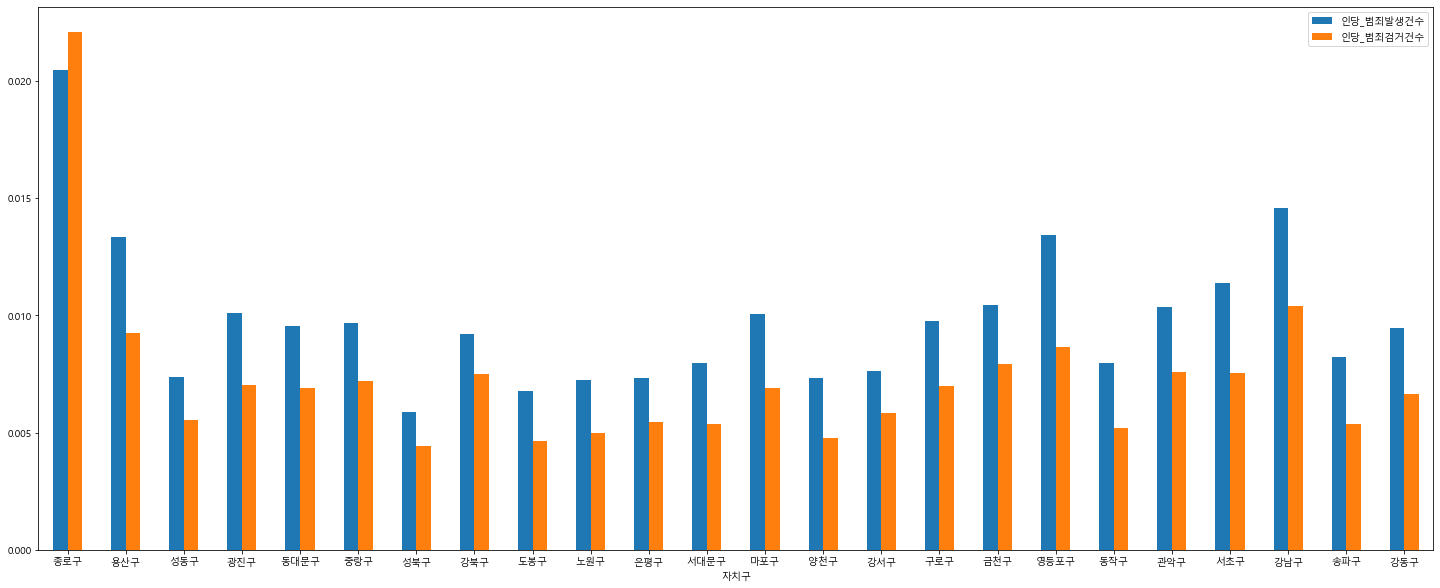

In [14]:
# data visualization
# 1. Crime occurrence and arrest per capita in Seoul

df.plot.bar(x='자치구', y=['인당_범죄발생건수','인당_범죄검거건수'], rot=0, figsize=(25,10))
plt.show()
    

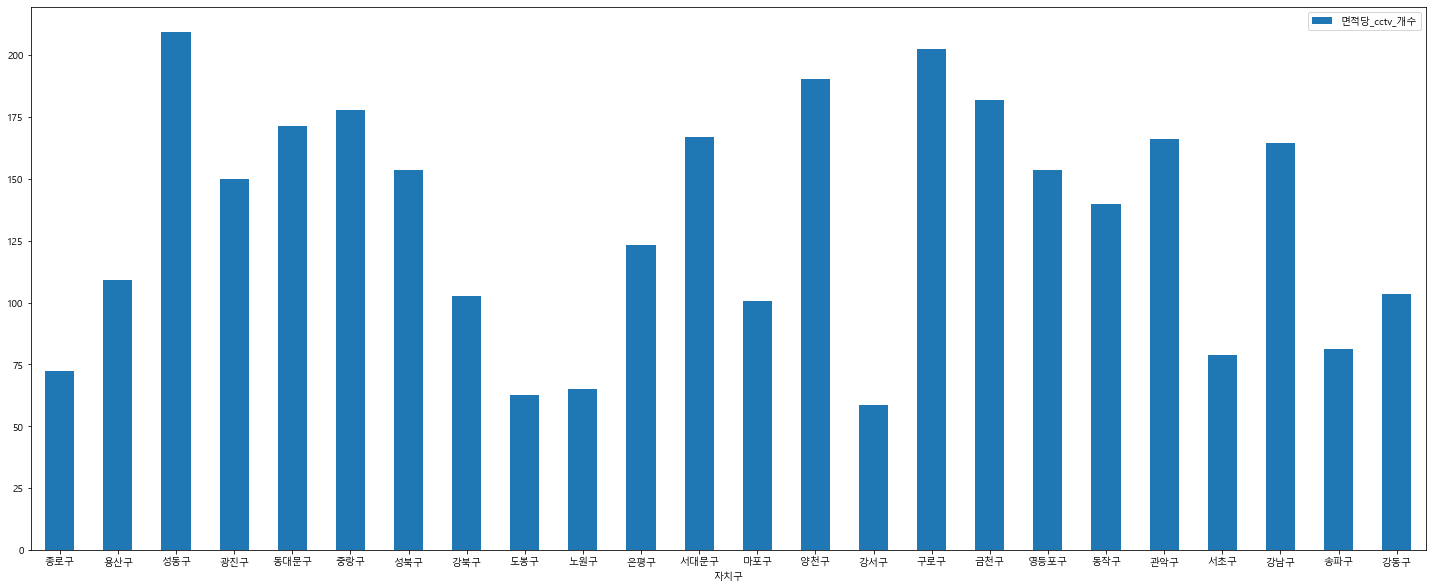

In [15]:
# 2. numbers of CCTV per area in Seoul
df.plot.bar(x='자치구', y='면적당_cctv_개수', rot=0, figsize=(25,10))
plt.show()

In [16]:
df.columns

Index(['자치구', '면적당_cctv_개수', '인당_범죄발생건수', '인당_범죄검거건수'], dtype='object')

In [17]:
df.head(5)

,자치구,면적당_cctv_개수,인당_범죄발생건수,인당_범죄검거건수
0,종로구,72.312840,0.020464,0.022054
1,용산구,108.962048,0.013355,0.009248
2,성동구,209.134045,0.007393,0.005553
3,광진구,149.824150,0.010082,0.007030
4,동대문구,171.167370,0.009556,0.006926


# Regression analysis
Y is '면적당 cctv 개수' and Xs are '인당 범죄발생건수' and '인당 범죄검거건수'.
By doing Regression analysis, check the relation between X and Y.

I will define X1 as '인당 범죄발생건수' and X2 as '인당 범죄검거건수'.

C:\dataanalysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='인당_범죄발생건수', ylabel='Density'>

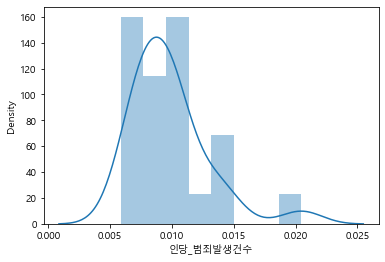

In [18]:
# 1. in the case of X1
##1.1 distplot(X1)
sns.distplot(df['인당_범죄발생건수'])


C:\dataanalysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_num_crime', ylabel='Density'>

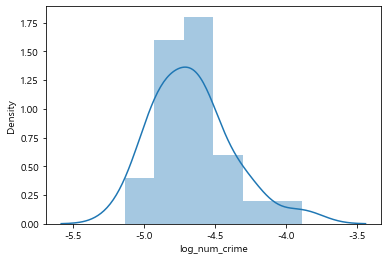

In [19]:

## 1.2 log(X1)
df['log_num_crime'] = df['인당_범죄발생건수'].apply(math.log)

## 1.3 displot(log(X1))
sns.distplot(df['log_num_crime'])

C:\dataanalysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='인당_범죄검거건수', ylabel='Density'>

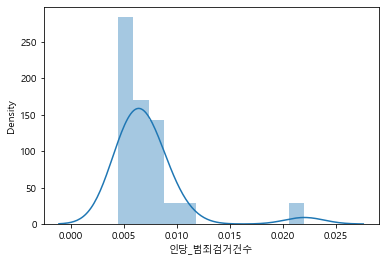

In [20]:
# 2. in the case of X1

## 2.1 distplot(X2)
sns.distplot(df['인당_범죄검거건수'])


C:\dataanalysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_arrest_crime', ylabel='Density'>

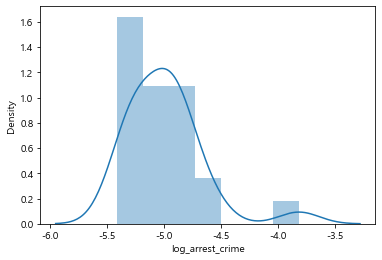

In [21]:

## 2.2 log(X2)
df['log_arrest_crime'] = df['인당_범죄검거건수'].apply(math.log)

## 2.3 displot(log(X2))
sns.distplot(df['log_arrest_crime'])

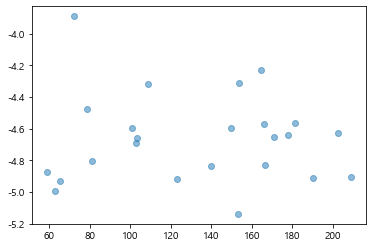

In [22]:
# scatter(y,x1)
y = df.면적당_cctv_개수
x1 = df.log_num_crime

plt.scatter(y,x1,alpha=0.5)

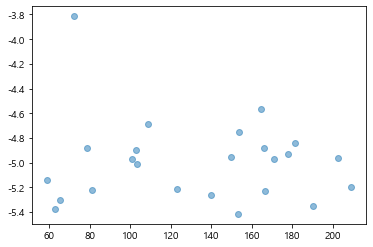

In [23]:
# scatter(y,x2)
y = df.면적당_cctv_개수
x2 = df.log_arrest_crime

plt.scatter(y,x2,alpha=0.5)

In [24]:
# regression analysis: Y and X1
df_ols = smf.ols('log_num_crime~면적당_cctv_개수',df).fit()
df_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_num_crime   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                   0.05522
Date:                Wed, 25 May 2022   Prob (F-statistic):              0.816
Time:                        22:06:31   Log-Likelihood:                -3.0298
No. Observations:                  24   AIC:                             10.06
Df Residuals:                      22   BIC:                             12.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.6256      0.177    -26.150      0.000      -4.992      -4.259
면적당_cctv_개수    -0.0003      0.001     -0.235      0.816      -0.003       0.002
==============================================================================
Omnibus:                        4.447   Durbin-Watson:                   1.226
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                2.722
Skew:                           0.777   Prob(JB):                        0.256
Kurtosis:                       3.554   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# regression analysis: Y and X2
df_ols = smf.ols('log_arrest_crime~면적당_cctv_개수',df).fit()
df_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log_arrest_crime   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.1781
Date:                Wed, 25 May 2022   Prob (F-statistic):              0.677
Time:                        22:06:31   Log-Likelihood:                -7.3958
No. Observations:                  24   AIC:                             18.79
Df Residuals:                      22   BIC:                             21.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.9077      0.212    -23.130      0.000      -5.348      -4.468
면적당_cctv_개수    -0.0006      0.002     -0.422      0.677      -0.004       0.002
==============================================================================
Omnibus:                       17.708   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.076
Skew:                           1.552   Prob(JB):                     1.61e-05
Kurtosis:                       6.528   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Short Conclusion**
There is no relation between CCTV and crime in Seoul